<a href="https://colab.research.google.com/github/joost0252/DMML2022_Tudor/blob/main/Data_Mining_%26_Machine_Learning_Project_Neural_Network_Multiple_Hidden_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install and update spaCy
!pip install -U spacy

# Download the english language model
!python -m spacy download en
!python -m spacy download fr_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-12 15:01:52.219332: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 9.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-12 15:02:04.059270: E tensorflow/stream_executor/cuda/cuda_driv

In [ ]:
!pip install spacy-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import required packages
import spacy
from spacy import displacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np
import spacy_transformers
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
corpus = pd.read_csv("training_data.csv")

In [ ]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4800 non-null   int64 
 1   sentence    4800 non-null   object
 2   difficulty  4800 non-null   object
dtypes: int64(1), object(2)
memory usage: 112.6+ KB


In [ ]:
corpus.shape

(4800, 3)

In [ ]:
corpus.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [ ]:
unlabel_data_LR = pd.read_csv("unlabelled_test_data.csv")
unlabel_data_LR.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


In [ ]:
unlabel_data_knn = unlabel_data_LR.copy()
unlabel_data_knn.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


In [ ]:
unlabel_data_tree = unlabel_data_LR.copy()
unlabel_data_tree.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


In [ ]:
unlabel_data_forest = unlabel_data_LR.copy()
unlabel_data_forest.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


In [ ]:
submission_data = pd.read_csv('sample_submission.csv')
submission_data.head()

,id,difficulty
0,0,A1
1,1,A1
2,2,A1
3,3,A1
4,4,A1


In [ ]:
corpus.dtypes

id             int64
sentence      object
difficulty    object
dtype: object

In [ ]:
corpus.iloc[0:,1]

0       Les coûts kilométriques réels peuvent diverger...
1       Le bleu, c'est ma couleur préférée mais je n'a...
2       Le test de niveau en français est sur le site ...
3                Est-ce que ton mari est aussi de Boston?
4       Dans les écoles de commerce, dans les couloirs...
                              ...                        
4795    C'est pourquoi, il décida de remplacer les hab...
4796    Il avait une de ces pâleurs splendides qui don...
4797    Et le premier samedi de chaque mois, venez ren...
4798    Les coûts liés à la journalisation n'étant pas...
4799    Sur le sable, la mer haletait de toute la resp...
Name: sentence, Length: 4800, dtype: object

### 4. Train your models

Set your X and y variables. 
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)`.

#### 4.1.Baseline
What is the baseline for this classification problem?

In [ ]:
np.random.seed = 0

In [ ]:
base_rate = corpus['difficulty'].value_counts()/len(corpus['difficulty'])
base_rate.round(4)

A1    0.1694
C2    0.1681
C1    0.1662
B1    0.1656
A2    0.1656
B2    0.1650
Name: difficulty, dtype: float64

In [ ]:
base_rate.max()

0.169375

#### 4.2. Logistic Regression (without data cleaning)

Train a simple logistic regression model using a Tfidf vectoriser.

In [ ]:
#nlp = spacy.load('fr_core_news_sm')
#def spacy_tokenizer(sentence):
  #mytokens = nlp(sentence)
  #mytokens = [ word.lemma_ for word in mytokens ]
  #mytokens = [word for word  in mytokens]
  #return mytokens
  #We did not do lemmatization in order to keep the grammar strucutre which is important for language level. 

In [ ]:
#corpus.iloc[0:,1]

In [ ]:
#spacy_tokenizer(corpus.iloc[100,1])

In [ ]:
tfidf_vector = TfidfVectorizer()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

In [ ]:
corpus

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1
...,...,...,...
4795,4795,"C'est pourquoi, il décida de remplacer les hab...",B2
4796,4796,Il avait une de ces pâleurs splendides qui don...,C1
4797,4797,"Et le premier samedi de chaque mois, venez ren...",A2
4798,4798,Les coûts liés à la journalisation n'étant pas...,C2


In [ ]:
# IN ordinal Encoder an order of categories can be count and can set

oe=OrdinalEncoder()
# set the order of your categories
oe.set_params(categories= [['A1', 'A2', 'B1', 'B2', 'C1', 'C2']])

# fit-transform a dataframe of the categorical age variable
oe_difficulty = oe.fit_transform(corpus[['difficulty']])

corpus['difficulty'] = pd.DataFrame(oe_difficulty).astype('int')


In [ ]:
corpus

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,4
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",0
2,2,Le test de niveau en français est sur le site ...,0
3,3,Est-ce que ton mari est aussi de Boston?,0
4,4,"Dans les écoles de commerce, dans les couloirs...",2
...,...,...,...
4795,4795,"C'est pourquoi, il décida de remplacer les hab...",3
4796,4796,Il avait une de ces pâleurs splendides qui don...,4
4797,4797,"Et le premier samedi de chaque mois, venez ren...",1
4798,4798,Les coûts liés à la journalisation n'étant pas...,5


In [ ]:
X = corpus['sentence']
y= corpus['difficulty']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
X_train

70                                Comment t'appelles-tu ?
4347    Voilà qui serait en effet de nature à simplifi...
1122    Les pèlerins partagèrent alors cette célébrati...
4570                          Qu'est-ce que vous faites ?
34      En voici un des moins obscurs : "Plus nous dev...
                              ...                        
1033    Les micro-changements apportés par ce type d'u...
3264    J'allais à la poste quand j'ai croisé ma cousi...
1653    Au cours des années 1970 et 1980, plusieurs gr...
2607    Stop : tout d'abord, figurez-vous que les vrai...
2732    "On s'est alors dit que le terrain commençait ...
Name: sentence, Length: 3840, dtype: object

In [ ]:
y_train

70      0
4347    3
1122    4
4570    0
34      5
       ..
1033    3
3264    1
1653    4
2607    3
2732    2
Name: difficulty, Length: 3840, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
classifier = LogisticRegression()

In [ ]:
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def evaluate(true, pred):
    precision = precision_score(true, pred, average='micro')
    recall = recall_score(true, pred,average='micro')
    f1 = f1_score(true, pred, average='micro')
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true,pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")

In [ ]:
# Predictions
y_pred = pipe.predict(X_test)

#### Calculate accuracy, precision, recall and F1 score on the test set.


In [ ]:
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[93 31 21 10  4  2]
 [54 60 30  6  6  8]
 [12 38 64 17  9 20]
 [ 6  6 15 66 27 24]
 [ 4  4 10 37 73 45]
 [ 7  8  8 19 24 92]]
ACCURACY SCORE:
0.4667
CLASSIFICATION REPORT:
	Precision: 0.4667
	Recall: 0.4667
	F1_Score: 0.4667


Have a look at the confusion matrix and identify a few examples of sentences that are not well classified.

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")

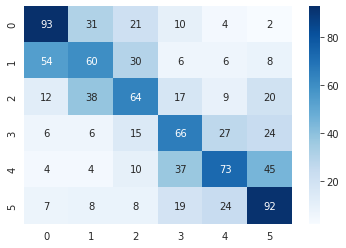

In [ ]:
cnf_matrix = sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Blues', fmt='.5g');

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.58      0.55       161
           1       0.41      0.37      0.39       164
           2       0.43      0.40      0.42       160
           3       0.43      0.46      0.44       144
           4       0.51      0.42      0.46       173
           5       0.48      0.58      0.53       158

    accuracy                           0.47       960
   macro avg       0.46      0.47      0.46       960
weighted avg       0.47      0.47      0.46       960



In [ ]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

In [ ]:
print(FP)

[83 87 84 89 70 99]


In [ ]:
print(TP)

[93 60 64 66 73 92]


In [ ]:
X_test[y_test != y_pred].head()

2255    C'est en décembre 1967, après bien des invecti...
608     Giscard va pourtant réussir à transformer ce r...
2856    Un choix difficile mais important : le public ...
1889    Le débat porte plutôt sur l'utilité d'une tell...
2358    Il faut du temps et du courage pour soigner to...
Name: sentence, dtype: object

Generate your first predictions on the `unlabelled_test_data.csv`. make sure your predictions match the format of the `unlabelled_test_data.csv`.

In [ ]:
X_test

2255    C'est en décembre 1967, après bien des invecti...
608     Giscard va pourtant réussir à transformer ce r...
2856    Un choix difficile mais important : le public ...
1889    Le débat porte plutôt sur l'utilité d'une tell...
1519                    Et chez vous, comment va la vie ?
                              ...                        
3553    Ils s'engouffraient dans les sentiers, puis se...
4595    Tous les prix sont affichés, mais si besoin, j...
891     Très présente dans l'alimentation antillaise, ...
1005    On réinvente le dimanche dans une perspective ...
1940    Pour les femmes surtout, nuancent Régine Lemoi...
Name: sentence, Length: 960, dtype: object

In [ ]:
unlabel_data_LR['difficulty'] = pipe.predict(unlabel_data_LR['sentence'])

In [ ]:
unlabel_data_LR

,id,sentence,difficulty
0,0,Nous dûmes nous excuser des propos que nous eû...,5
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...,1
2,2,"Et, paradoxalement, boire froid n'est pas la b...",0
3,3,"Ce n'est pas étonnant, car c'est une saison my...",0
4,4,"Le corps de Golo lui-même, d'une essence aussi...",5
...,...,...,...
1195,1195,C'est un phénomène qui trouve une accélération...,5
1196,1196,Je vais parler au serveur et voir si on peut d...,1
1197,1197,Il n'était pas comme tant de gens qui par pare...,5
1198,1198,Ils deviennent dangereux pour notre économie.,4


In [ ]:
unlabel_data_LR['difficulty'] = unlabel_data_LR['difficulty'].astype('category').cat.rename_categories(["A1", "A2", "B1", "B2", "C1", "C2"])

In [ ]:
unlabel_data_LR

,id,sentence,difficulty
0,0,Nous dûmes nous excuser des propos que nous eû...,C2
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...,A2
2,2,"Et, paradoxalement, boire froid n'est pas la b...",A1
3,3,"Ce n'est pas étonnant, car c'est une saison my...",A1
4,4,"Le corps de Golo lui-même, d'une essence aussi...",C2
...,...,...,...
1195,1195,C'est un phénomène qui trouve une accélération...,C2
1196,1196,Je vais parler au serveur et voir si on peut d...,A2
1197,1197,Il n'était pas comme tant de gens qui par pare...,C2
1198,1198,Ils deviennent dangereux pour notre économie.,C1


In [ ]:
#We want here to take a quick look to how accurate are our predictions. 
probability_class_LR = np.max(pipe.predict_proba(unlabel_data_LR['sentence']), axis=1)
probability_class_LR

array([0.27300494, 0.36319585, 0.55127922, ..., 0.64308869, 0.18782657,
       0.20279673])

In [ ]:
#As we can see depending on the row the probability of the predicted value goes from 18% to 64% but always above the baserate.

In [ ]:
predictionsLR = unlabel_data_LR.drop(columns=["sentence"])

In [ ]:
#unlabel_data.to_csv(r"C:\Users\joost\OneDrive\Documenten\Studie\Master Supply Chain Management\QTEM\Data Mining and Machine Learning\Project\Predictions_LR.csv", index=False)
predictionsLR.to_csv("Predictions_LR_tudor.csv", index=False)

#### 4.3. KNN (without data cleaning)

Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights = "uniform", p=2) # try p=6, because of 6 features, thus 6 dimensions?

In [ ]:
pipe_knn = Pipeline([('vectorizer', tfidf_vector),
                 ('KNN', knn)])

# Fit model on training set
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])

In [ ]:
# Predictions
y_pred_knn = pipe_knn.predict(X_test)

In [ ]:
evaluate(y_test, y_pred_knn)

CONFUSION MATRIX:
[[121  28   8   1   1   2]
 [ 98  51  12   1   1   1]
 [ 81  39  33   3   1   3]
 [ 49  30  19  29   3  14]
 [ 48  36  29  15  29  16]
 [ 37  29  17  23   9  43]]
ACCURACY SCORE:
0.3187
CLASSIFICATION REPORT:
	Precision: 0.3187
	Recall: 0.3187
	F1_Score: 0.3187


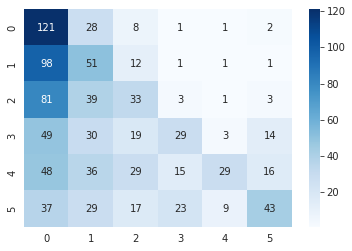

In [ ]:
cnf_matrix = sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_knn)), annot=True, cmap='Blues', fmt='.5g');

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_knn)

In [ ]:
print (classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.28      0.75      0.41       161
           1       0.24      0.31      0.27       164
           2       0.28      0.21      0.24       160
           3       0.40      0.20      0.27       144
           4       0.66      0.17      0.27       173
           5       0.54      0.27      0.36       158

    accuracy                           0.32       960
   macro avg       0.40      0.32      0.30       960
weighted avg       0.40      0.32      0.30       960



Try to improve it by tuning the hyper parameters (`n_neighbors`,   `p`, `weights`).

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# KNN plot

for k in [1, 3, 5, 7, 9, 11, 13, 15]:
  knn = KNeighborsClassifier(n_neighbors=k, weights = "uniform", p = 2)
  pipe_knn = Pipeline([('vectorizer', tfidf_vector),
                 ('KNN', knn)])

# Fit model on training set
  pipe_knn.fit(X_train, y_train)
  # Predictions
  y_pred_knn = pipe_knn.predict(X_test)
  print(f"ACCURACY SCORE(k={k}, p=2):\n{accuracy_score(y_test, y_pred_knn):.4f}")

ACCURACY SCORE(k=1, p=2):
0.3667
ACCURACY SCORE(k=3, p=2):
0.3021
ACCURACY SCORE(k=5, p=2):
0.3187
ACCURACY SCORE(k=7, p=2):
0.3167
ACCURACY SCORE(k=9, p=2):
0.3042
ACCURACY SCORE(k=11, p=2):
0.3156
ACCURACY SCORE(k=13, p=2):
0.3250
ACCURACY SCORE(k=15, p=2):
0.3333


In [ ]:
# KNN plot

for k in [1, 3, 5, 7, 9, 11, 13, 15]:
  knn = KNeighborsClassifier(n_neighbors=k, weights = "uniform", p = 1)
  pipe_knn = Pipeline([('vectorizer', tfidf_vector),
                 ('KNN', knn)])

# Fit model on training set
  pipe_knn.fit(X_train, y_train)
  # Predictions
  y_pred_knn = pipe_knn.predict(X_test)
  print(f"ACCURACY SCORE(k={k}, p=1):\n{accuracy_score(y_test, y_pred_knn):.4f}")

ACCURACY SCORE(k=1, p=1):
0.2469
ACCURACY SCORE(k=3, p=1):
0.1865
ACCURACY SCORE(k=5, p=1):
0.1740
ACCURACY SCORE(k=7, p=1):
0.1708
ACCURACY SCORE(k=9, p=1):
0.1688
ACCURACY SCORE(k=11, p=1):
0.1677
ACCURACY SCORE(k=13, p=1):
0.1677
ACCURACY SCORE(k=15, p=1):
0.1677


In [ ]:
# KNN plot

for k in [1, 3, 5, 7, 9, 11, 13, 15]:
  knn = KNeighborsClassifier(n_neighbors=k, weights = "distance", p = 2)
  pipe_knn = Pipeline([('vectorizer', tfidf_vector),
                 ('KNN', knn)])

# Fit model on training set
  pipe_knn.fit(X_train, y_train)
  # Predictions
  y_pred_knn = pipe_knn.predict(X_test)
  print(f"ACCURACY SCORE(k={k}, p=2, weights=distance):\n{accuracy_score(y_test, y_pred_knn):.4f}")

ACCURACY SCORE(k=1, p=2, weights=distance):
0.3667
ACCURACY SCORE(k=3, p=2, weights=distance):
0.3615
ACCURACY SCORE(k=5, p=2, weights=distance):
0.3490
ACCURACY SCORE(k=7, p=2, weights=distance):
0.3594
ACCURACY SCORE(k=9, p=2, weights=distance):
0.3479
ACCURACY SCORE(k=11, p=2, weights=distance):
0.3542
ACCURACY SCORE(k=13, p=2, weights=distance):
0.3490
ACCURACY SCORE(k=15, p=2, weights=distance):
0.3521


In [ ]:
# KNN plot

for k in [1, 3, 5, 7, 9, 11, 13, 15]:
  knn = KNeighborsClassifier(n_neighbors=k, weights = "distance", p = 1)
  pipe_knn = Pipeline([('vectorizer', tfidf_vector),
                 ('KNN', knn)])

# Fit model on training set
  pipe_knn.fit(X_train, y_train)
  # Predictions
  y_pred_knn = pipe_knn.predict(X_test)
  print(f"ACCURACY SCORE(k={k}, p=1, weights=distance):\n{accuracy_score(y_test, y_pred_knn):.4f}")

ACCURACY SCORE(k=1, p=1, weights=distance):
0.2469
ACCURACY SCORE(k=3, p=1, weights=distance):
0.2146
ACCURACY SCORE(k=5, p=1, weights=distance):
0.2010
ACCURACY SCORE(k=7, p=1, weights=distance):
0.1938
ACCURACY SCORE(k=9, p=1, weights=distance):
0.1885
ACCURACY SCORE(k=11, p=1, weights=distance):
0.1812
ACCURACY SCORE(k=13, p=1, weights=distance):
0.1792
ACCURACY SCORE(k=15, p=1, weights=distance):
0.1781


In [ ]:
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Generate your first predictions on the `unlabelled_test_data.csv`. make sure your predictions match the format of the `unlabelled_test_data.csv`.

In [ ]:
unlabel_data_knn['difficulty'] = pipe_knn.predict(unlabel_data_knn['sentence'])

In [ ]:
unlabel_data_knn

,id,sentence,difficulty
0,0,Nous dûmes nous excuser des propos que nous eû...,0
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...,0
2,2,"Et, paradoxalement, boire froid n'est pas la b...",0
3,3,"Ce n'est pas étonnant, car c'est une saison my...",0
4,4,"Le corps de Golo lui-même, d'une essence aussi...",0
...,...,...,...
1195,1195,C'est un phénomène qui trouve une accélération...,0
1196,1196,Je vais parler au serveur et voir si on peut d...,0
1197,1197,Il n'était pas comme tant de gens qui par pare...,0
1198,1198,Ils deviennent dangereux pour notre économie.,0


In [ ]:
#unlabel_data_knn['difficulty'] = unlabel_data_knn['difficulty'].astype('category').cat.rename_categories(["A1", "A2", "B1", "B2", "C1", "C2"])

#### 4.4. Decision Tree Classifier (without data cleaning)

Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier()

In [ ]:
pipe_tree = Pipeline([('vectorizer', tfidf_vector),
                 ('Tree', tree)])

# Fit model on training set
pipe_tree.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('Tree', DecisionTreeClassifier())])

In [ ]:
y_pred_tree = pipe_tree.predict(X_test)

In [ ]:
y_pred_tree

array([1, 4, 5, 4, 0, 0, 2, 5, 5, 0, 0, 2, 2, 3, 2, 3, 2, 3, 0, 0, 1, 0,
       0, 2, 3, 0, 4, 2, 3, 4, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 4, 1, 5, 0,
       5, 3, 1, 2, 5, 2, 4, 0, 3, 0, 3, 5, 5, 1, 5, 3, 1, 2, 1, 2, 0, 0,
       1, 3, 0, 0, 3, 1, 4, 5, 0, 2, 2, 5, 1, 4, 5, 1, 4, 2, 4, 4, 0, 3,
       0, 1, 5, 4, 2, 4, 3, 0, 4, 3, 0, 0, 5, 1, 2, 3, 2, 0, 0, 0, 5, 0,
       0, 5, 0, 0, 2, 0, 0, 1, 3, 2, 2, 1, 1, 0, 5, 5, 1, 0, 1, 0, 5, 2,
       2, 0, 3, 1, 0, 2, 5, 5, 2, 4, 3, 4, 3, 2, 1, 5, 2, 2, 0, 2, 3, 1,
       3, 3, 1, 3, 3, 0, 4, 5, 3, 1, 1, 2, 0, 3, 3, 0, 4, 3, 5, 5, 5, 3,
       3, 2, 2, 0, 4, 2, 1, 3, 1, 3, 2, 0, 5, 5, 2, 4, 3, 3, 0, 3, 2, 4,
       5, 3, 1, 1, 5, 2, 3, 4, 0, 1, 0, 4, 0, 3, 5, 3, 3, 0, 4, 5, 0, 2,
       1, 1, 2, 1, 4, 1, 4, 3, 2, 4, 1, 5, 5, 4, 4, 2, 3, 1, 1, 3, 2, 0,
       0, 1, 0, 0, 1, 1, 5, 4, 1, 4, 3, 2, 0, 1, 4, 2, 2, 2, 2, 3, 2, 5,
       4, 3, 4, 2, 4, 5, 0, 3, 0, 5, 4, 2, 4, 0, 1, 1, 5, 4, 0, 0, 4, 1,
       3, 4, 1, 2, 0, 0, 1, 1, 3, 1, 2, 3, 0, 2, 5,

In [ ]:
evaluate(y_test, y_pred_tree)

CONFUSION MATRIX:
[[82 37 26 10  2  4]
 [50 57 32 14  5  6]
 [25 39 42 18 19 17]
 [ 4 21 31 43 27 18]
 [12 13 36 40 40 32]
 [14 11 32 30 38 33]]
ACCURACY SCORE:
0.3094
CLASSIFICATION REPORT:
	Precision: 0.3094
	Recall: 0.3094
	F1_Score: 0.3094


Try to improve it by tuning the hyper parameters (`max_depth`, the depth of the decision tree).

In [ ]:
for i in [2, 3, 4, 5, 6, 7, 8, 9]:
  tree = DecisionTreeClassifier(max_depth = i)
  pipe_tree = Pipeline([('vectorizer', tfidf_vector),
                 ('Tree', tree)])
  
  # Fit model on training set
  pipe_tree.fit(X_train, y_train)
  # Predictions
  y_pred_tree = pipe_tree.predict(X_test)
  print(f"ACCURACY SCORE(max_depth={i}):\n{accuracy_score(y_test, y_pred_tree):.4f}")


ACCURACY SCORE(max_depth=2):
0.2802
ACCURACY SCORE(max_depth=3):
0.2687
ACCURACY SCORE(max_depth=4):
0.2771
ACCURACY SCORE(max_depth=5):
0.2823
ACCURACY SCORE(max_depth=6):
0.2979
ACCURACY SCORE(max_depth=7):
0.3031
ACCURACY SCORE(max_depth=8):
0.2979
ACCURACY SCORE(max_depth=9):
0.2885


#### 4.5. Random Forest Classifier (without data cleaning)

Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
# your code here

#### 4.6. Any other technique, including data cleaning if necessary

Try to improve accuracy by training a better model using the techniques seen in class, or combinations of them.

As usual, show the accuracy, precision, recall and f1 score on the test set.

In [ ]:
corpus_NN = pd.read_csv("training_data.csv")

In [ ]:
print(corpus_NN.head())
print(corpus_NN.isnull().sum())

   id                                           sentence difficulty
0   0  Les coûts kilométriques réels peuvent diverger...         C1
1   1  Le bleu, c'est ma couleur préférée mais je n'a...         A1
2   2  Le test de niveau en français est sur le site ...         A1
3   3           Est-ce que ton mari est aussi de Boston?         A1
4   4  Dans les écoles de commerce, dans les couloirs...         B1
id            0
sentence      0
difficulty    0
dtype: int64


In [ ]:
# IN ordinal Encoder an order of categories can be count and can set

oe=OrdinalEncoder()
# set the order of your categories
oe.set_params(categories= [['A1', 'A2', 'B1', 'B2', 'C1', 'C2']])

# fit-transform a dataframe of the categorical age variable
oe_difficulty = oe.fit_transform(corpus_NN[['difficulty']])

corpus_NN['difficulty'] = pd.DataFrame(oe_difficulty).astype('int')

In [ ]:
X = corpus_NN['sentence']
y = corpus_NN['difficulty']

In [ ]:
y

0       4
1       0
2       0
3       0
4       2
       ..
4795    3
4796    4
4797    1
4798    5
4799    5
Name: difficulty, Length: 4800, dtype: int64

In [ ]:
X

0       Les coûts kilométriques réels peuvent diverger...
1       Le bleu, c'est ma couleur préférée mais je n'a...
2       Le test de niveau en français est sur le site ...
3                Est-ce que ton mari est aussi de Boston?
4       Dans les écoles de commerce, dans les couloirs...
                              ...                        
4795    C'est pourquoi, il décida de remplacer les hab...
4796    Il avait une de ces pâleurs splendides qui don...
4797    Et le premier samedi de chaque mois, venez ren...
4798    Les coûts liés à la journalisation n'étant pas...
4799    Sur le sable, la mer haletait de toute la resp...
Name: sentence, Length: 4800, dtype: object

In [ ]:
import torch
import torch.nn as nn

Code is copied from website: https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/ so we have to still change this.
Check other embeding methods to use instead of tfidfVectorizer, like GloVe, fastText, etc..
https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html

In [ ]:
#Using tfidfVectorizer on X_train, 
from sklearn.feature_extraction.text import TfidfVectorizer 
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer() 
# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(X)

In [ ]:
#Here we print the tfidf from the first sentence (also copied from website):

# get the first vector out (for the first document) 
#first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0] #Change to 1 for second sentence, etc.
# place tf-idf values in a pandas data frame 
df = pd.DataFrame(tfidf_vectorizer_vectors.todense(), columns=tfidf_vectorizer.get_feature_names()) 
#df.sort_values(by=["tfidf"],ascending=False)
df

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,02h00,03h00,10,100,1000,10000,105,11,110,...,événement,événements,êtes,être,êtres,êut,île,îles,ôta,ôter
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.200821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(4800, 14585)

In [ ]:
#x_test = pd.DataFrame(tfidf_vectorizer_vectors.todense(), columns=tfidf_vectorizer.get_feature_names()) 
#x_test.sample(5)

In [ ]:
#tfidf for the X_test:
#tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
#X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [ ]:
X_test

,000,02h00,03h00,10,100,1000,10000,105,11,110,...,événement,événements,êtes,être,êtres,êut,île,îles,ôta,ôter
2255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train

,000,02h00,03h00,10,100,1000,10000,105,11,110,...,événement,événements,êtes,être,êtres,êut,île,îles,ôta,ôter
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.174746,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test

2255    4
608     4
2856    1
1889    2
1519    0
       ..
3553    3
4595    1
891     4
1005    4
1940    4
Name: difficulty, Length: 960, dtype: int64

In [ ]:
y_train

70      0
4347    3
1122    4
4570    0
34      5
       ..
1033    3
3264    1
1653    4
2607    3
2732    2
Name: difficulty, Length: 3840, dtype: int64

In [ ]:
y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [ ]:
X_train = torch.tensor(X_train.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float)
X_test = torch.tensor(X_test.values, dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.float)

In [ ]:
print(X_train.size(), y_train.size()) #The difference in size might a problem.

torch.Size([3840, 14585]) torch.Size([3840, 1])


In [ ]:
print(X_test.size(), y_test.size()) #The difference in size might a problem.

torch.Size([960, 14585]) torch.Size([960, 1])


In [ ]:
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out):
        super(Net, self).__init__()
        
        self.linear1 = nn.Linear(D_in, H1) #try to experiment with others like bilinear, 
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, H3)
        self.linear4 = nn.Linear(H3, D_out)
        self.activation = nn.ReLU()
        
    def forward(self, x):
        y_pred_nn = self.activation(self.linear1(x))
        y_pred_nn = self.activation(self.linear2(y_pred_nn))
        y_pred_nn = self.activation(self.linear3(y_pred_nn))
        y_pred_nn = self.linear4(y_pred_nn)
        return y_pred_nn


In [ ]:
D_in, D_out = X_train.shape[1], y_train.shape[1]

In [ ]:
print(X_train.size(), y_train.size())

torch.Size([3840, 14585]) torch.Size([3840, 1])


In [ ]:
print(X_test.size(), y_test.size())

#Problem is in X_test, this has 5177 columuns (for each word (or sentence, I forgot at this point) that is vectorized with tf-idf), so 
#I think we should first vectorize the whole data set, and after that we split it in train and test.

torch.Size([960, 14585]) torch.Size([960, 1])


In [ ]:
X_train.shape

torch.Size([3840, 14585])

In [ ]:
y_train.shape

torch.Size([3840, 1])

In [ ]:
model1 = Net(D_in, 50, 50, 50, D_out)

In [ ]:
# MSE loss
criterion = nn.MSELoss(reduction='sum')
# SGD optimizer for finding the weights of the network
optimizer = torch.optim.SGD(model1.parameters(), lr=1e-4)

In [ ]:
#y_pred_nn.shape

In [ ]:
y_train.shape

torch.Size([3840, 1])

In [ ]:
y_train.dtype

torch.float32

In [ ]:
losses1 = []
losses1_test = []
for t in range(328):
    y_pred_nn = model1(X_train)
    
    loss = criterion(y_pred_nn, y_train)
    print(t, loss.item())
    losses1.append(loss.item())
    
    if torch.isnan(loss):
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # test loss
    losses1_test.append(criterion(model1(X_test), y_test).item())


0 34240.5625
1 11541.8486328125
2 11762.966796875
3 11709.970703125
4 11929.783203125
5 11613.69921875
6 11638.0068359375
7 11427.349609375
8 11397.7880859375
9 11329.111328125
10 11311.216796875
11 11290.7255859375
12 11282.806640625
13 11275.9951171875
14 11272.1435546875
15 11269.185546875
16 11266.8525390625
17 11264.66796875
18 11262.423828125
19 11260.248046875
20 11257.9111328125
21 11255.357421875
22 11252.572265625
23 11249.419921875
24 11245.88671875
25 11241.966796875
26 11237.6123046875
27 11232.5458984375
28 11227.03125
29 11220.8232421875
30 11213.7705078125
31 11205.599609375
32 11193.99609375
33 11181.9287109375
34 11168.51953125
35 11152.6767578125
36 11133.2783203125
37 11110.892578125
38 11084.556640625
39 11054.17578125
40 11023.330078125
41 11015.7998046875
42 11205.8154296875
43 12646.1318359375
44 14586.7958984375
45 11248.20703125
46 11233.0263671875
47 11216.6845703125
48 11200.88671875
49 11180.5751953125
50 11150.166015625
51 11123.9169921875
52 11080.5498046

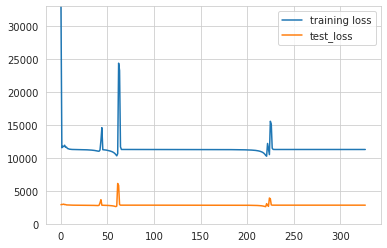

In [ ]:
plt.plot(losses1, label="training loss")
plt.plot(losses1_test, label="test_loss")
plt.ylim(top=33000, bottom=0.0)
plt.legend()

In [ ]:
y_pred_nn

tensor([[2.4974],
        [2.4974],
        [2.4974],
        ...,
        [2.4974],
        [2.4974],
        [2.4974]], grad_fn=<AddmmBackward0>)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test,y_pred_nn)

ValueError: ignored

#### 4.7. Show a summary of your results

In [ ]:
y_test.shape

In [ ]:
y_pred_nn.shape

In [ ]:
torch.isnan(y_pred_nn).sum() #all values are nan, so something went wrong

In [ ]:
evaluate(y_test, y_pred_nn)